
Shape of Dataset:
(7422, 32)

First 5 Rows:
   Unnamed: 0          ID  consumption_unit_total  calendar_month  community  \
0           1  201704-111            4.539462e+06          201704        111   
1           2  201704-112            1.001234e+07          201704        112   
2           3  201704-113            1.263421e+07          201704        113   
3           4  201704-114            1.003799e+07          201704        114   
4           5  201704-115            6.275032e+06          201704        115   

   year  temperature  NumOfConnected-COMMELEC  NumOfConnected-FREENRESIE  \
0  2017         30.8                       28                          0   
1  2017         30.8                     3000                          0   
2  2017         30.8                     3158                          0   
3  2017         30.8                     3317                          0   
4  2017         30.8                     1304                          0   

   NumOfConnected

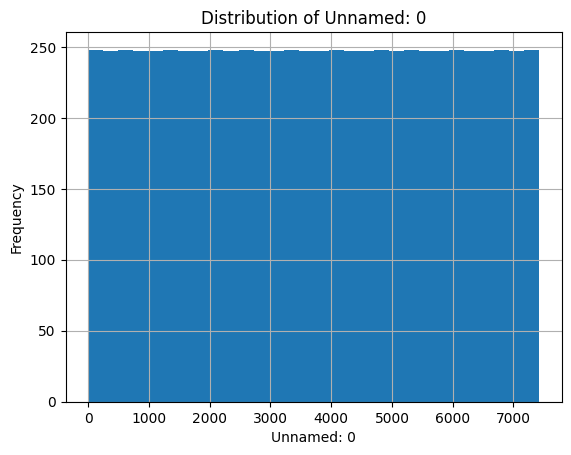

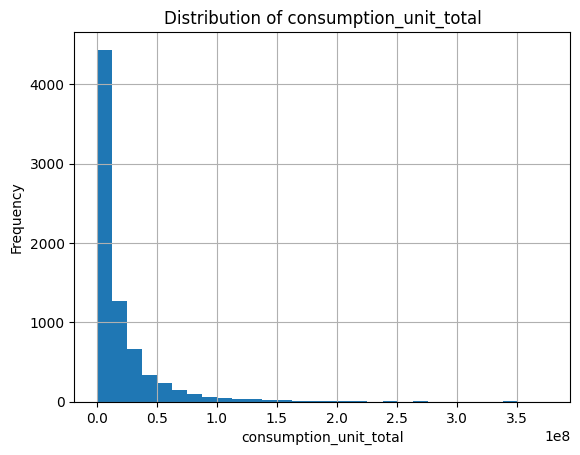

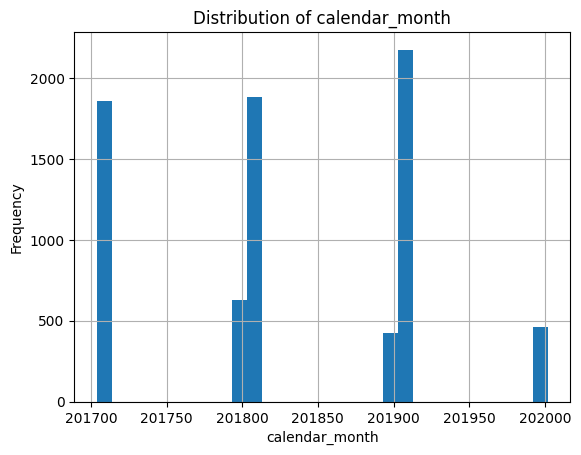

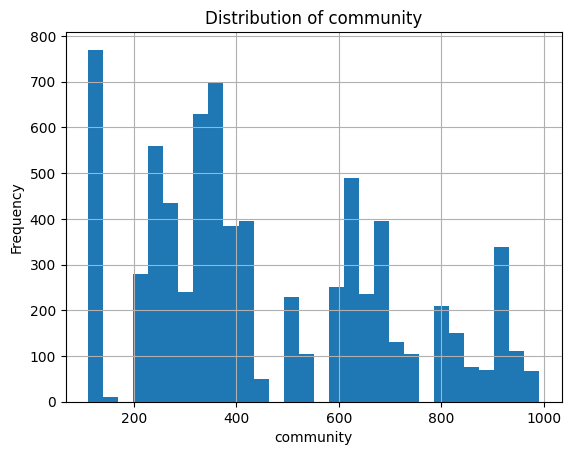

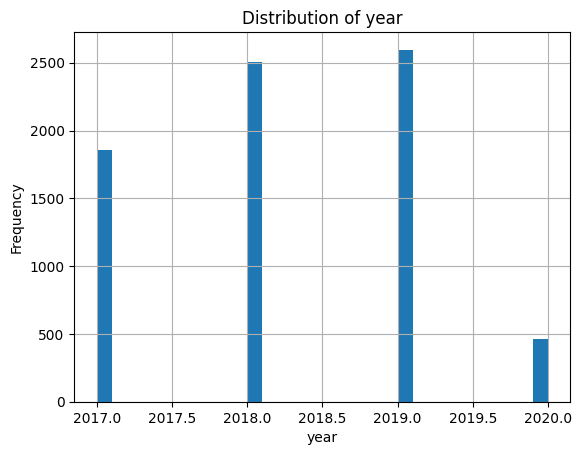

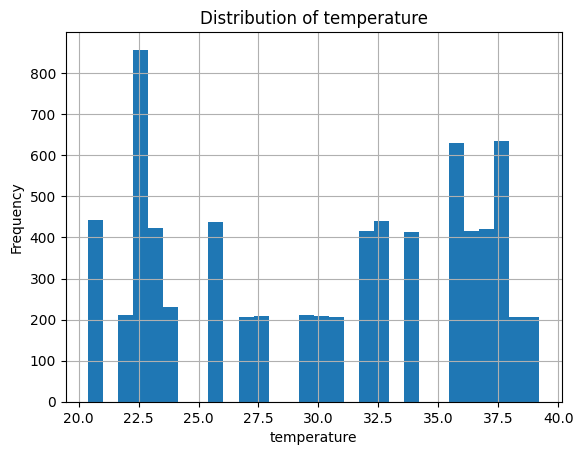

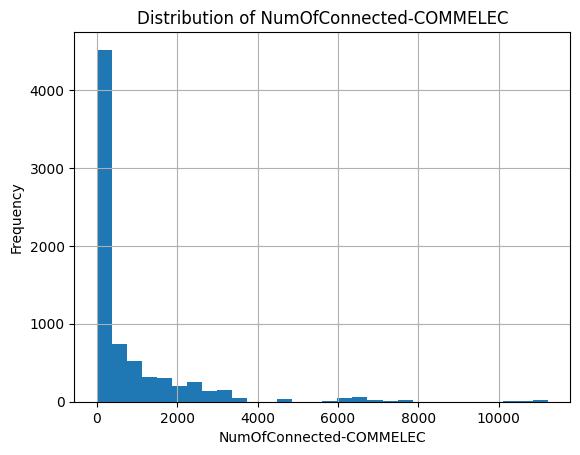

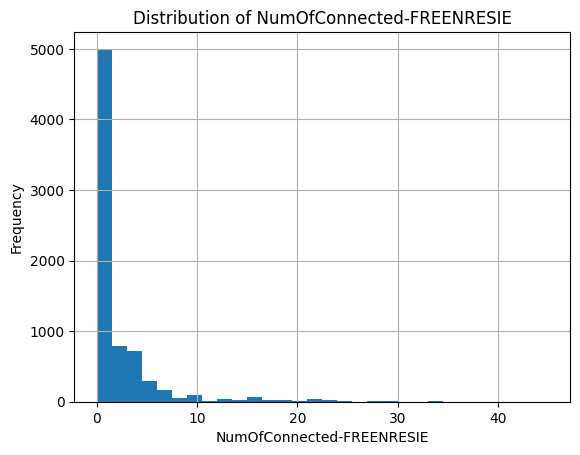

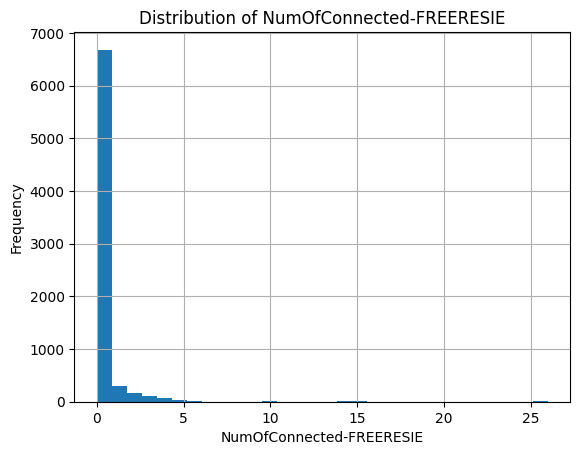

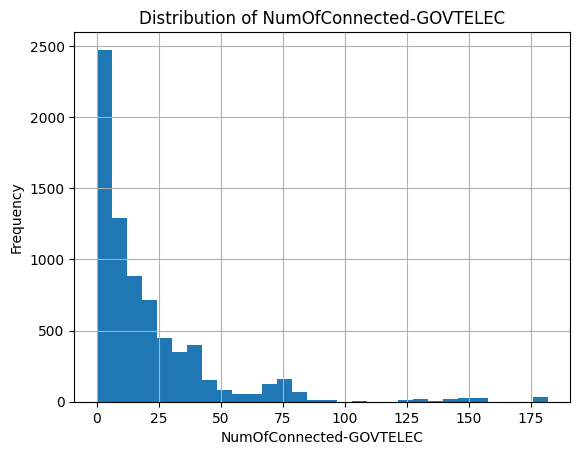

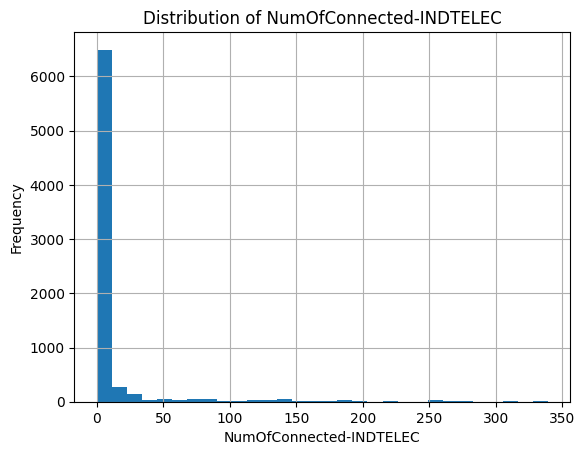

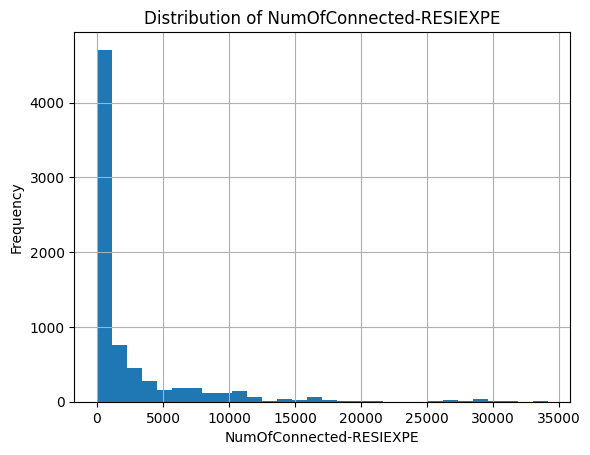

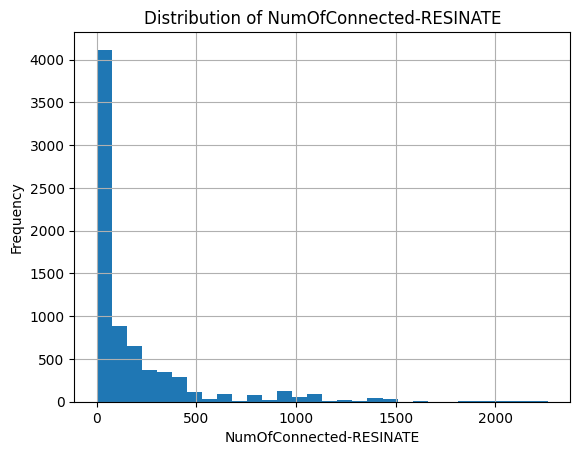

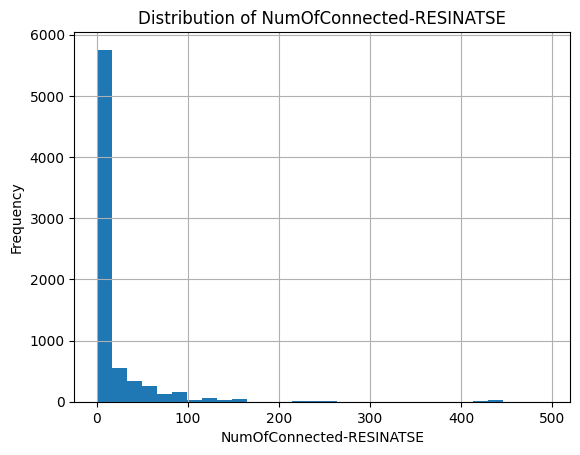

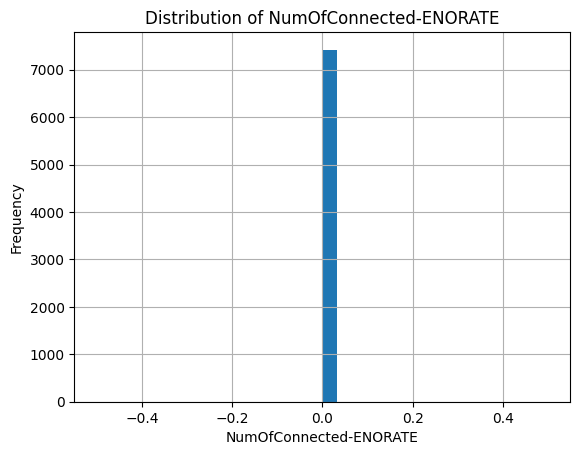

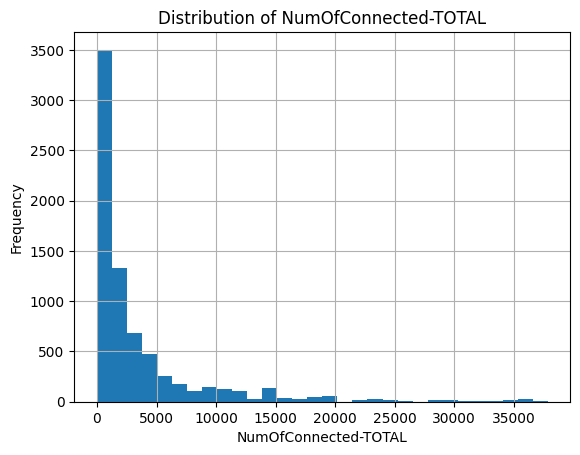

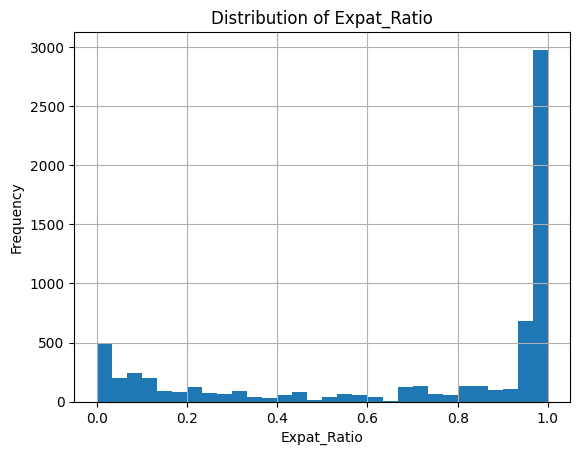

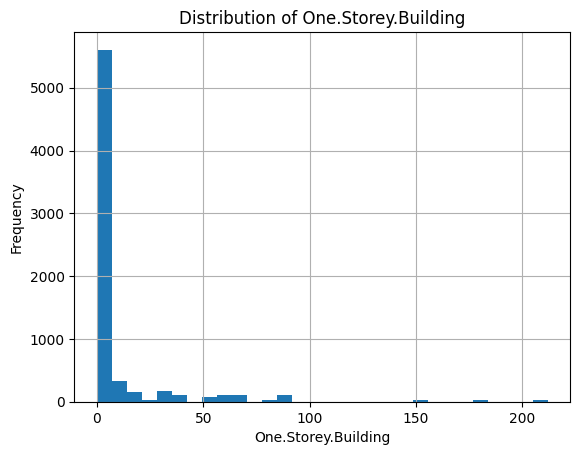

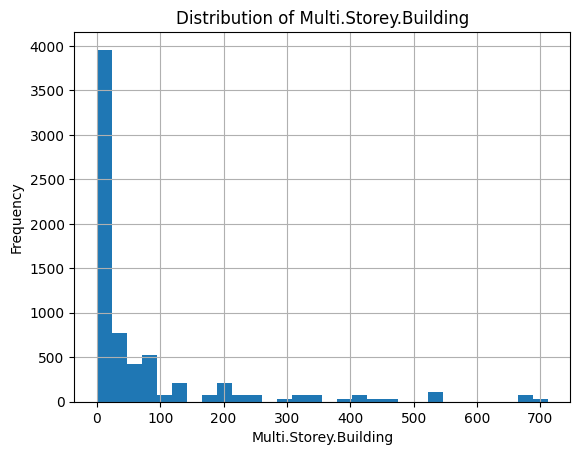

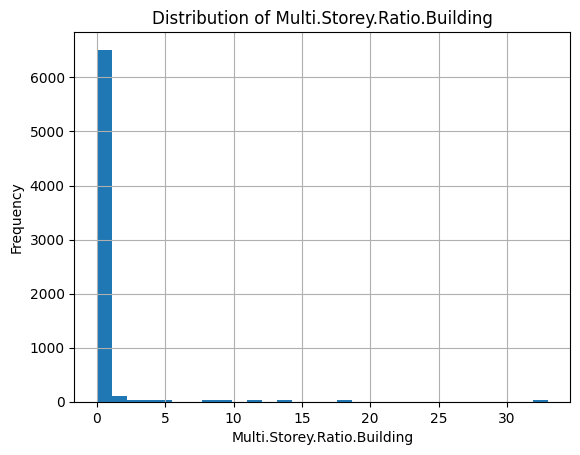

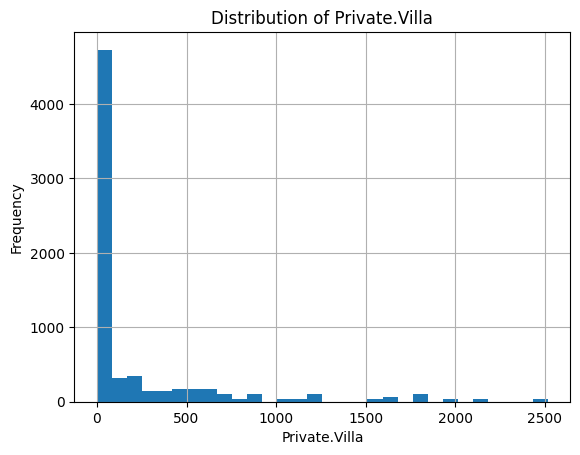

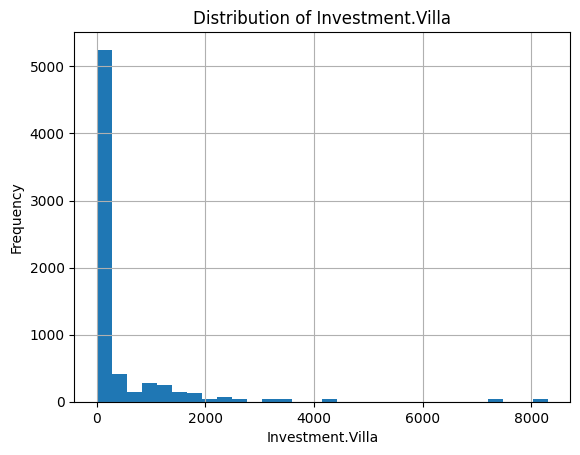

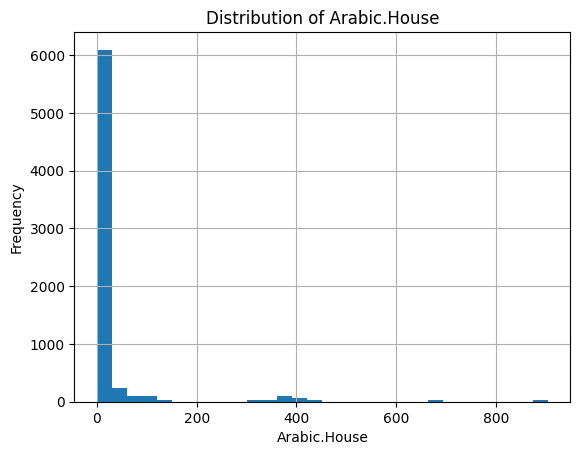

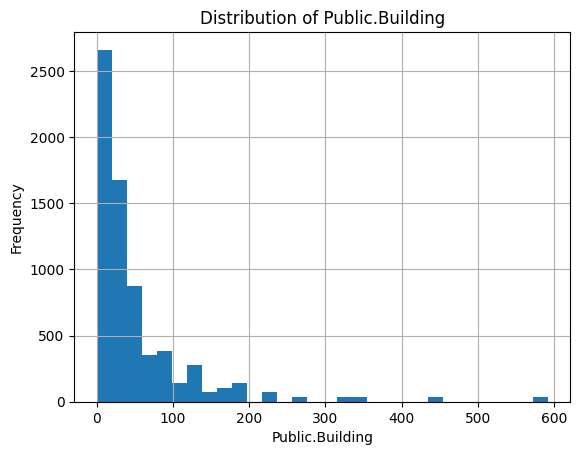

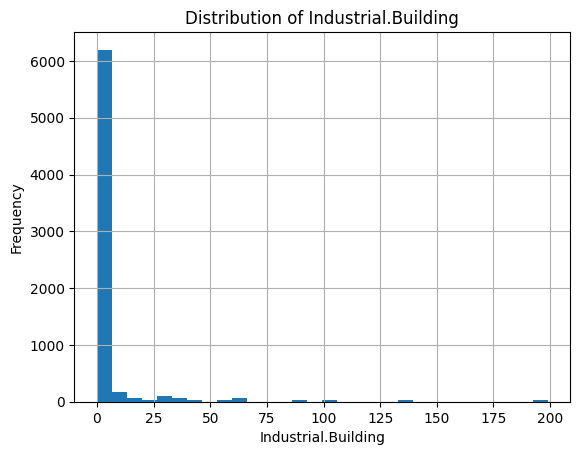

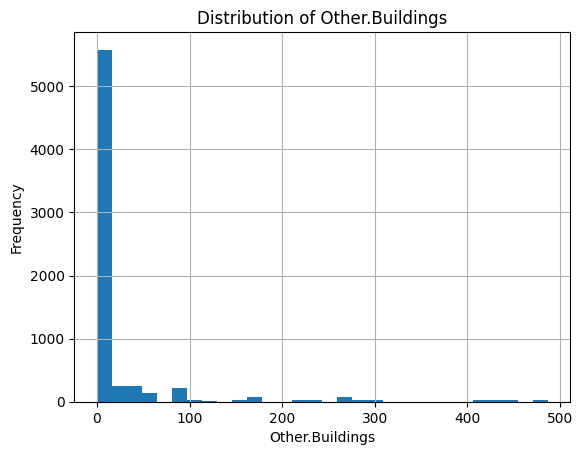

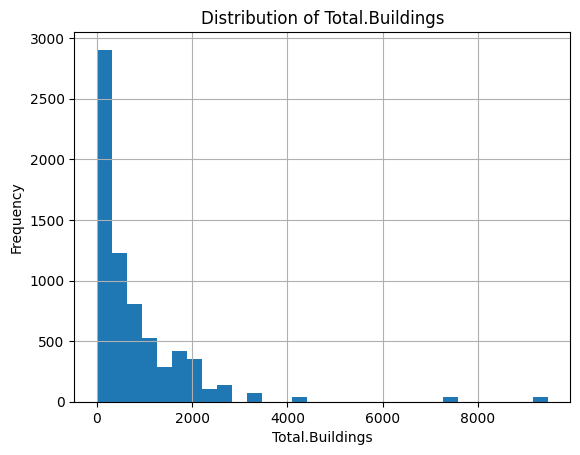

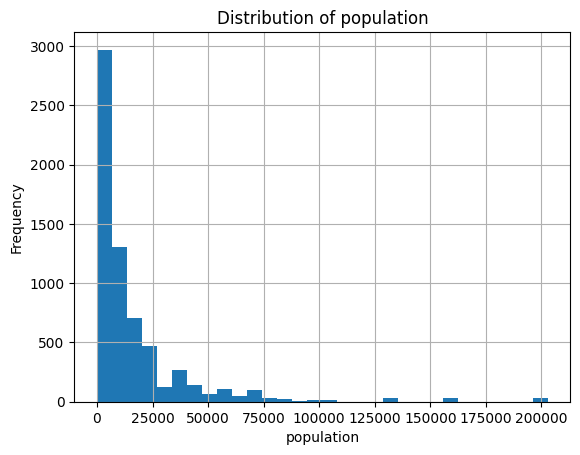

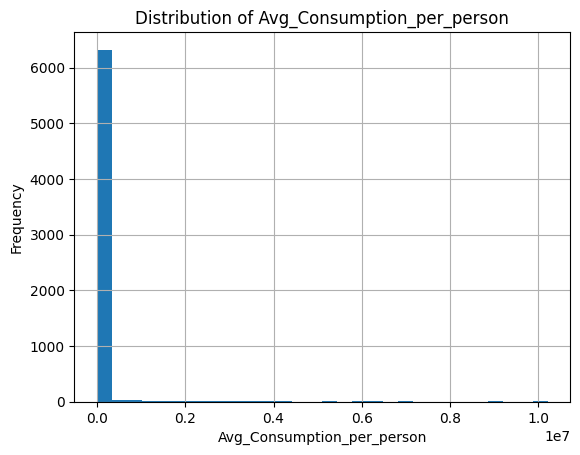

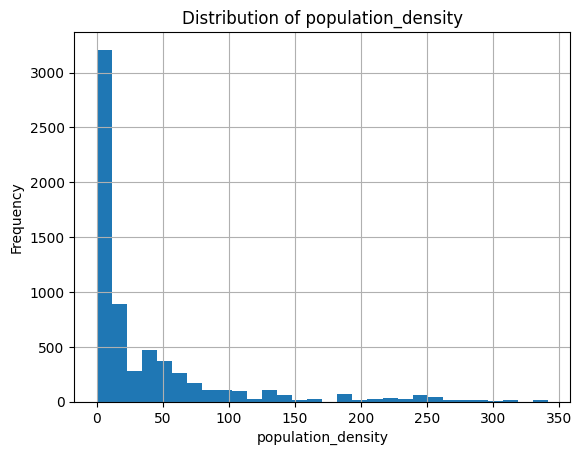

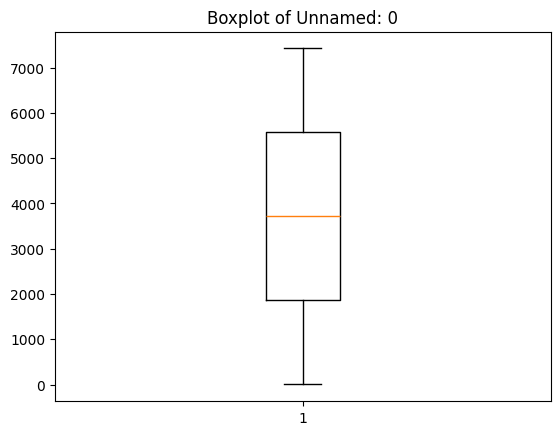

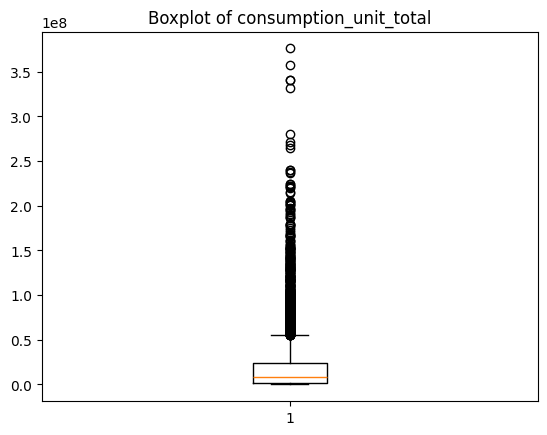

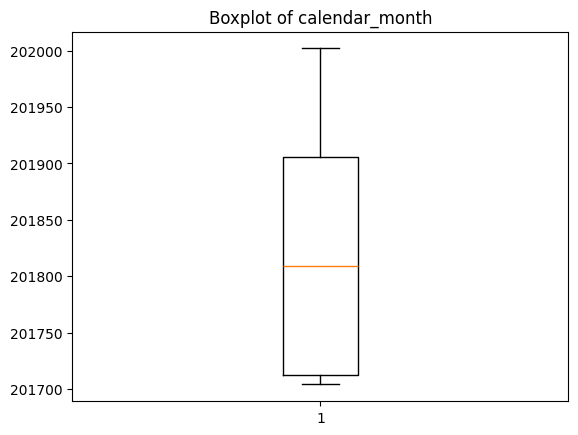

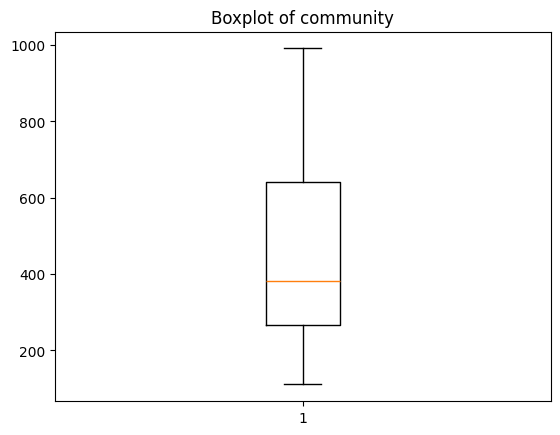

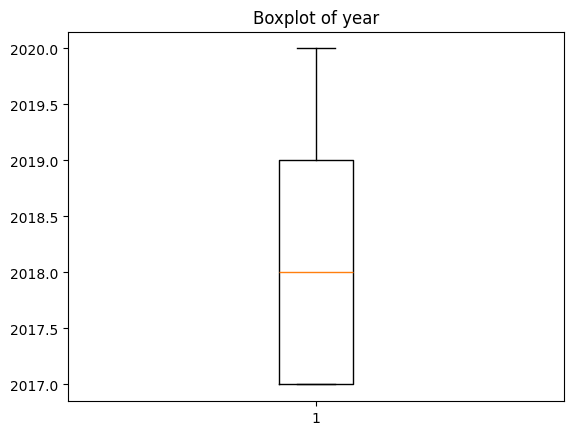

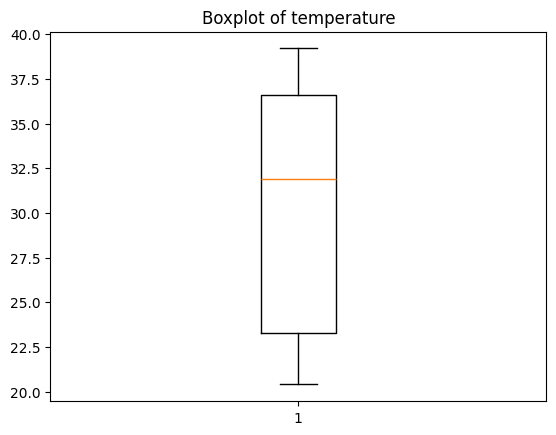

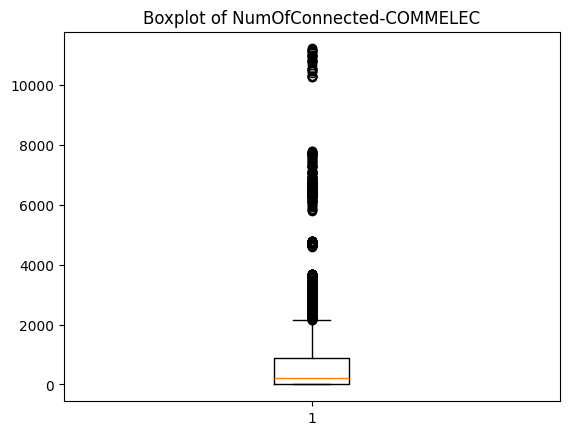

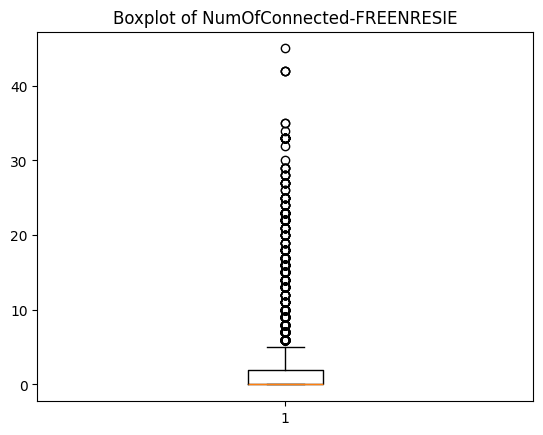

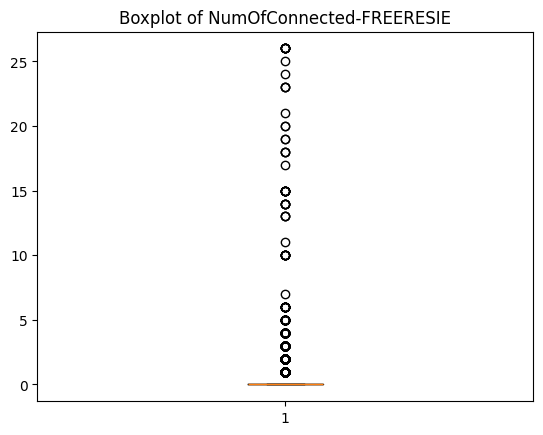

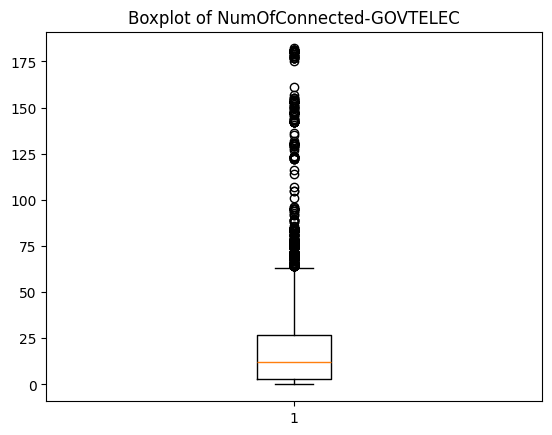

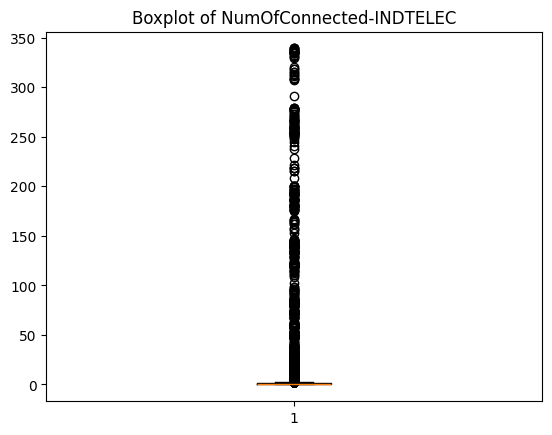

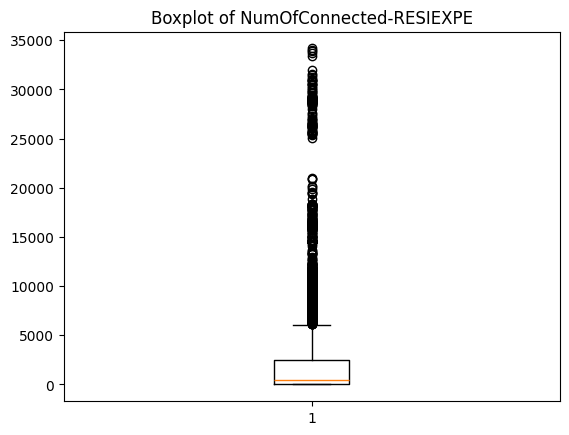

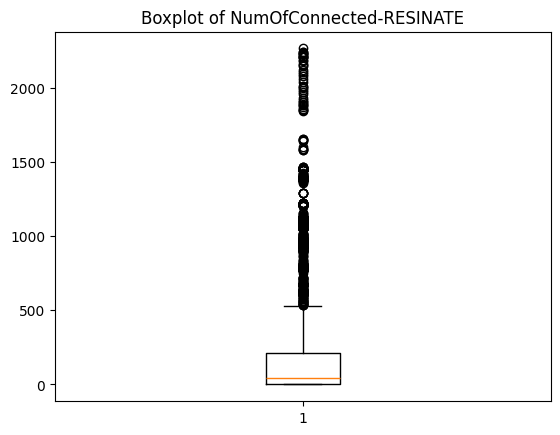

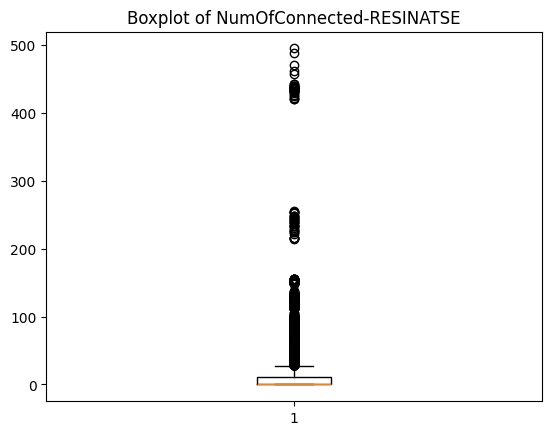

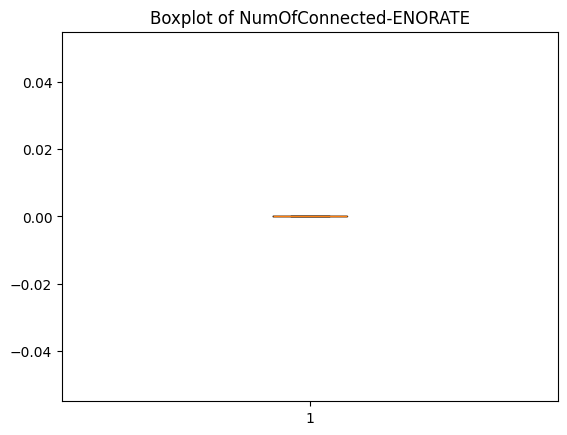

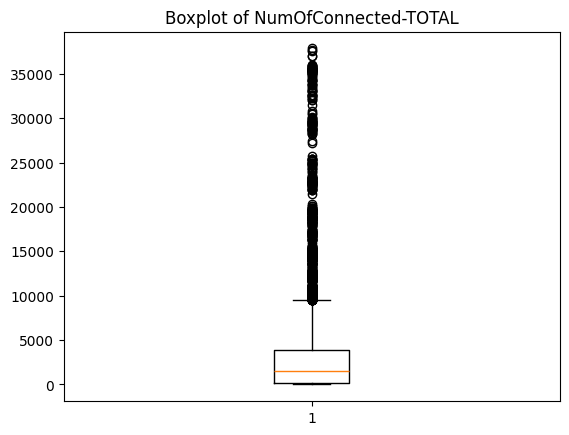

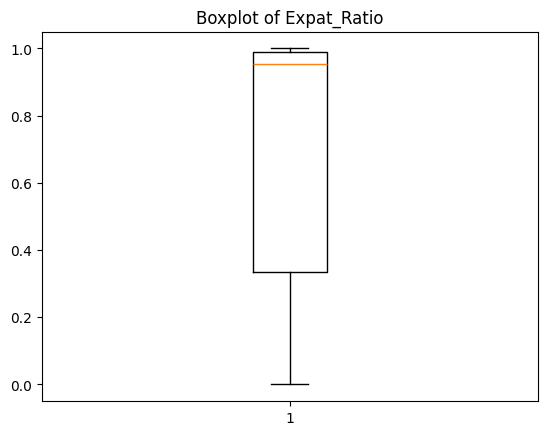

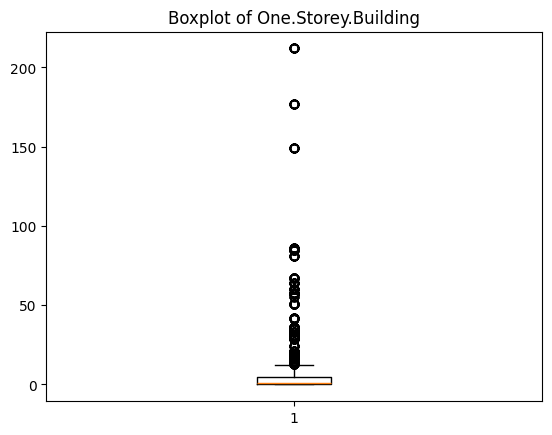

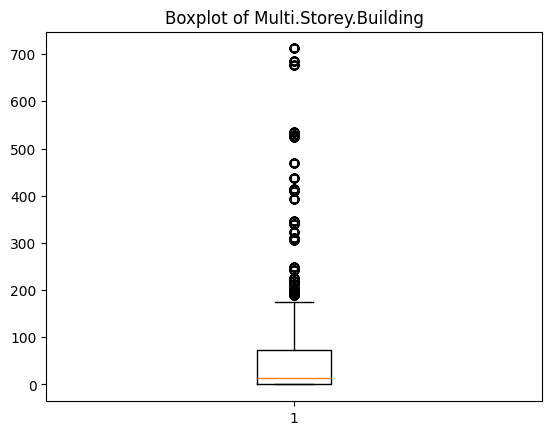

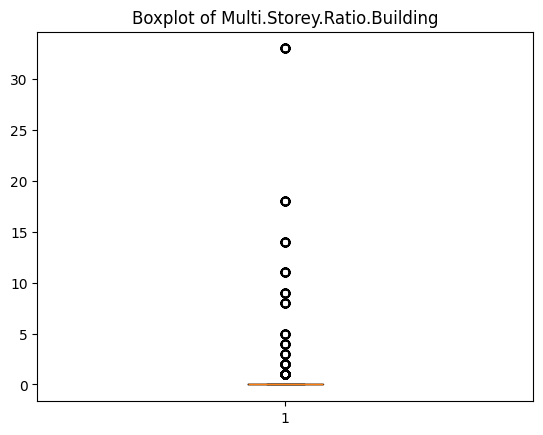

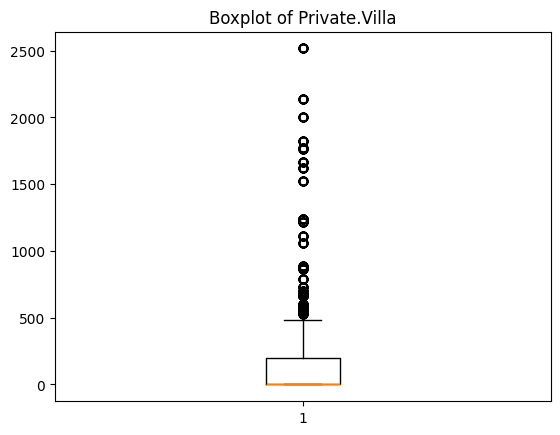

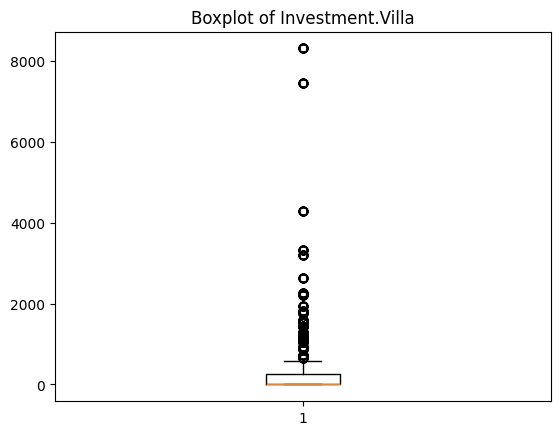

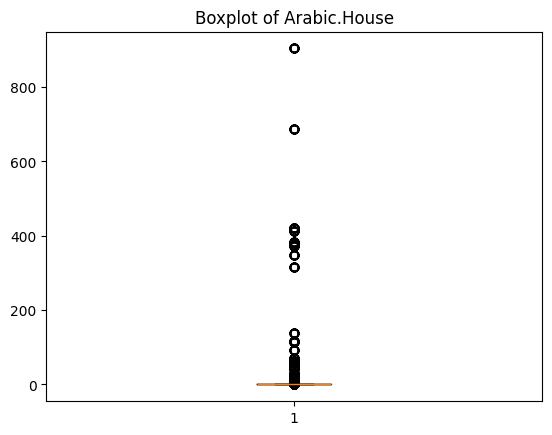

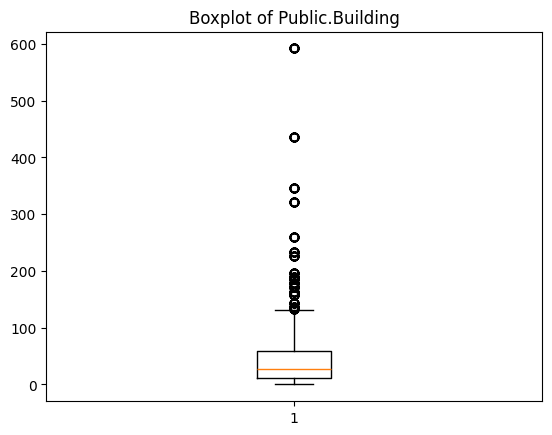

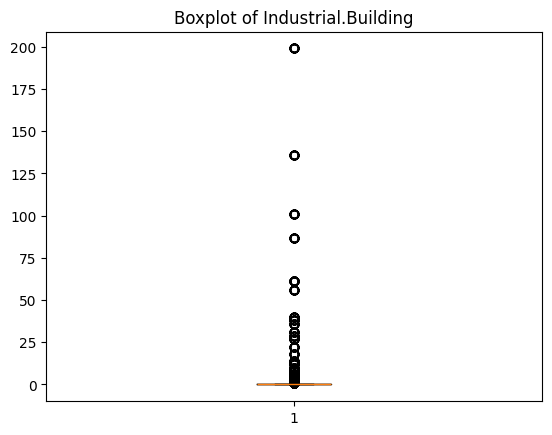

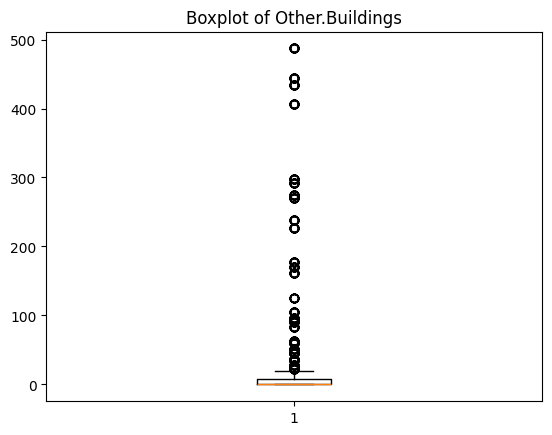

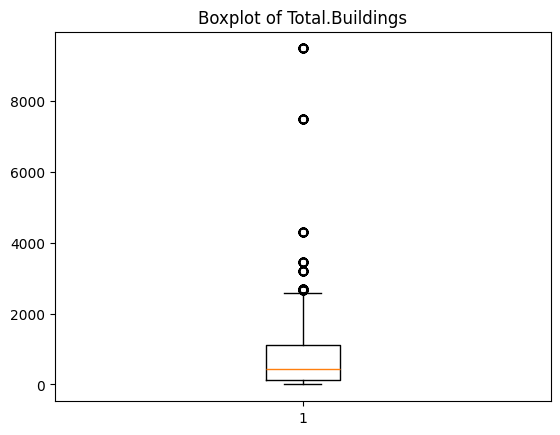

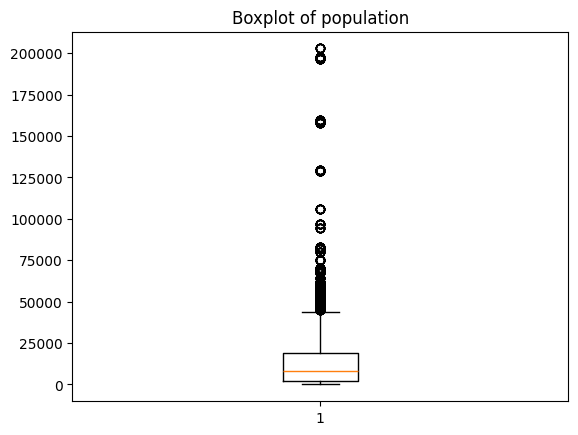

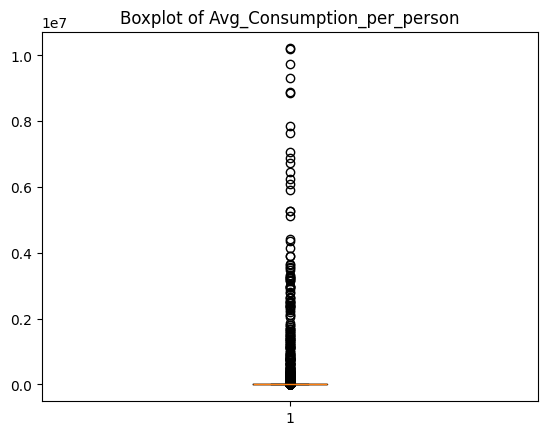

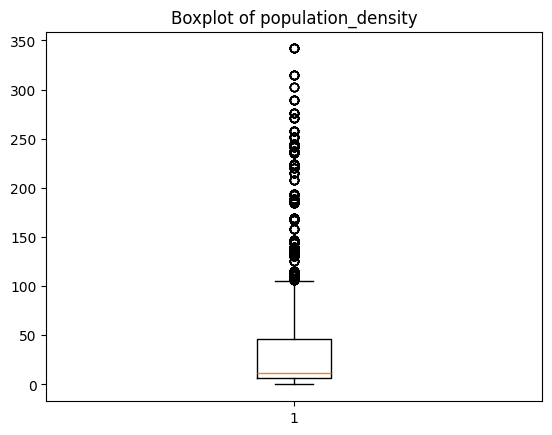

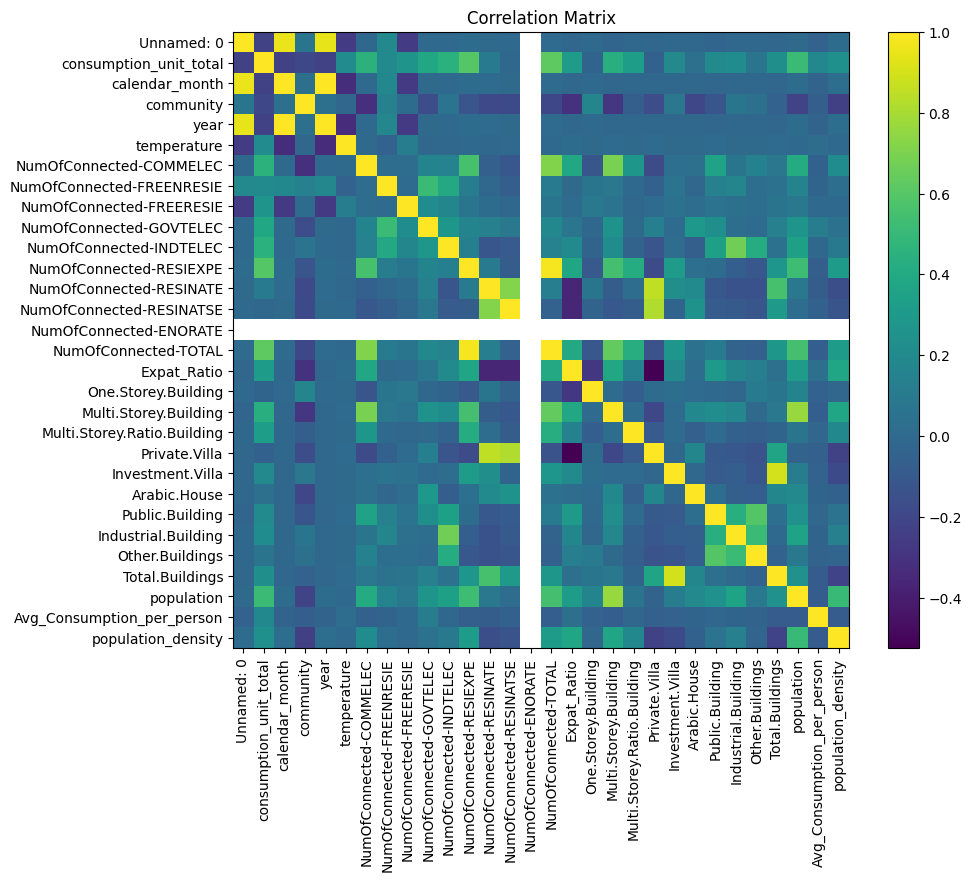


Highly Correlated Features (> 0.8):
calendar_month - Unnamed: 0 : 0.957555702069005
year - Unnamed: 0 : 0.9462085080944164
year - calendar_month : 0.9993051907708694
NumOfConnected-TOTAL - NumOfConnected-RESIEXPE : 0.9769990630430633
Private.Villa - NumOfConnected-RESINATE : 0.8548266599191717
Private.Villa - NumOfConnected-RESINATSE : 0.8156989238168015
Total.Buildings - Investment.Villa : 0.8935484522434576


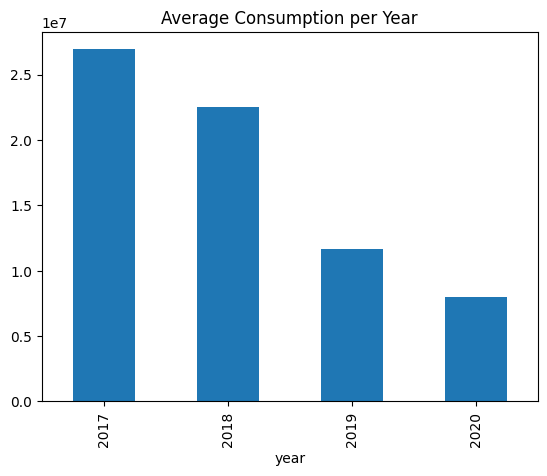


Top 10 Communities by Avg Consumption:
community
591    1.880947e+08
392    1.308619e+08
345    1.145426e+08
221    1.112592e+08
599    1.037638e+08
373    8.876281e+07
124    8.082007e+07
598    7.763738e+07
381    7.698643e+07
621    7.001960e+07
Name: consumption_unit_total, dtype: float64


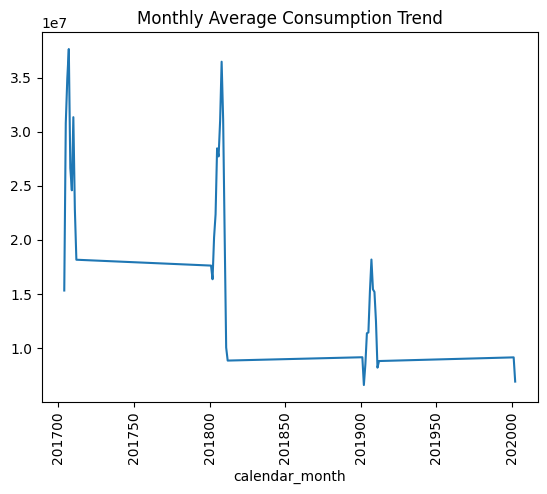

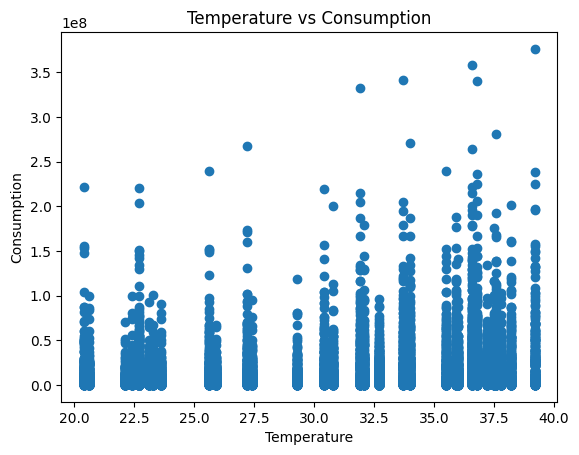


EDA Completed Successfully!


In [ ]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ================================
# 2. Load Dataset
# ================================
file_path = "Dataset.csv"   # change path if needed
df = pd.read_csv(file_path)

# Replace infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# ================================
# 3. Basic Overview
# ================================
print("\nShape of Dataset:")
print(df.shape)

print("\nFirst 5 Rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

# ================================
# 4. Missing Values Analysis
# ================================
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Missing percentage
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Percentage:")
print(missing_percent[missing_percent > 0])

# ================================
# 5. Numerical Columns
# ================================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# ================================
# 6. Distribution Plots
# ================================
for col in num_cols:
    if df[col].notna().sum() > 0:
        plt.figure()
        df[col].dropna().hist(bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# ================================
# 7. Boxplots (Outlier Detection)
# ================================
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()

# ================================
# 8. Correlation Matrix
# ================================
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Matrix")
plt.show()

# Print highly correlated pairs (> 0.8)
print("\nHighly Correlated Features (> 0.8):")
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            print(corr.columns[i], "-", corr.columns[j], ":", corr.iloc[i, j])

# ================================
# 9. Grouped Analysis Example
# ================================

# Average consumption per year
if "year" in df.columns and "consumption_unit_total" in df.columns:
    yearly = df.groupby("year")["consumption_unit_total"].mean()
    plt.figure()
    yearly.plot(kind='bar')
    plt.title("Average Consumption per Year")
    plt.show()

# Average consumption per community
if "community" in df.columns and "consumption_unit_total" in df.columns:
    community_avg = df.groupby("community")["consumption_unit_total"].mean()
    print("\nTop 10 Communities by Avg Consumption:")
    print(community_avg.sort_values(ascending=False).head(10))

# ================================
# 10. Time-Based Analysis
# ================================
if "calendar_month" in df.columns and "consumption_unit_total" in df.columns:
    monthly = df.groupby("calendar_month")["consumption_unit_total"].mean()
    plt.figure()
    monthly.plot()
    plt.title("Monthly Average Consumption Trend")
    plt.xticks(rotation=90)
    plt.show()

# ================================
# 11. Feature Relationships Example
# ================================
if "temperature" in df.columns:
    plt.figure()
    plt.scatter(df["temperature"], df["consumption_unit_total"])
    plt.xlabel("Temperature")
    plt.ylabel("Consumption")
    plt.title("Temperature vs Consumption")
    plt.show()

print("\nEDA Completed Successfully!")


/tmp/ipython-input-622/1175491533.py:62: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Random Forest Performance:
MAE  : 4565043.0653
RMSE : 8301114.2983
R²   : 0.6896
MAPE : inf%
Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0074 - val_loss: 0.0026
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0061 - val_loss: 0.0028
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0074 - val_loss: 0.0025
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0074 - val_loss: 0.0027
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0073 - val_loss: 0.0025
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0070 - val_loss: 0.0027
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0059 - val_loss: 0.0026
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0062 - val_loss: 0.0026
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0063 - val_loss: 0.0026
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━

/tmp/ipython-input-622/1175491533.py:62: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0073 - val_loss: 0.0026
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0062 - val_loss: 0.0026
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0067 - val_loss: 0.0025
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0065 - val_loss: 0.0027
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0068 - val_loss: 0.0025
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0072 - val_loss: 0.0027
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0060 - val_loss: 0.0030
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0060 - val_loss: 0.0024
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 12/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/ste

/tmp/ipython-input-622/1175491533.py:62: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


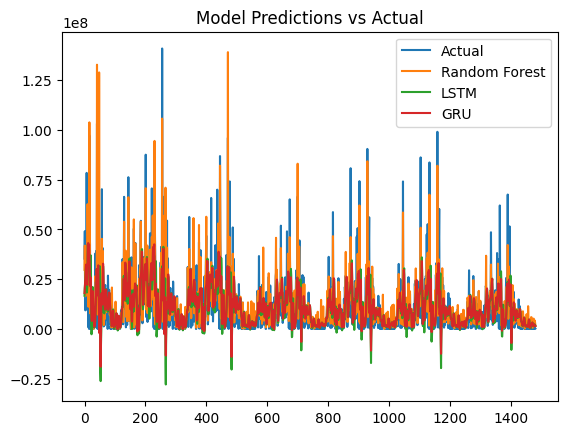

In [ ]:
# =====================================================
# 1. Import Libraries
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# =====================================================
# 2. Load and Prepare Dataset
# =====================================================

df = pd.read_csv("Dataset.csv")

# Sort by time (adjust if different time column exists)
if "year" in df.columns and "calendar_month" in df.columns:
    df = df.sort_values(by=["year", "calendar_month"])

target = "consumption_unit_total"

df = df[[target]].dropna()

# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# =====================================================
# 3. Create Time Sequences
# =====================================================

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 12  # Use last 12 months to predict next month

X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Train/Test Split (80/20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# =====================================================
# 4. Evaluation Function
# =====================================================

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{model_name} Performance:")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2f}%")

    return mae, rmse, r2, mape

# =====================================================
# 5. Model 1: Random Forest (Traditional ML)
# =====================================================

# Flatten sequences for ML model
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train.ravel())

rf_pred = rf.predict(X_test_rf)

# Inverse scale
rf_pred = scaler.inverse_transform(rf_pred.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test)

rf_results = evaluate_model(y_test_inv, rf_pred, "Random Forest")

# =====================================================
# 6. Model 2: LSTM
# =====================================================

lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

lstm_model.fit(X_train, y_train,
               epochs=20,
               batch_size=32,
               validation_split=0.1,
               verbose=1)

lstm_pred = lstm_model.predict(X_test)

# Inverse scale
lstm_pred = scaler.inverse_transform(lstm_pred)

lstm_results = evaluate_model(y_test_inv, lstm_pred, "LSTM")

# =====================================================
# 7. Model 3: GRU
# =====================================================

gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])

gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

gru_model.fit(X_train, y_train,
              epochs=20,
              batch_size=32,
              validation_split=0.1,
              verbose=1)

gru_pred = gru_model.predict(X_test)

# Inverse scale
gru_pred = scaler.inverse_transform(gru_pred)

gru_results = evaluate_model(y_test_inv, gru_pred, "GRU")

# =====================================================
# 8. Compare Results
# =====================================================

results_df = pd.DataFrame({
    "Model": ["Random Forest", "LSTM", "GRU"],
    "MAE": [rf_results[0], lstm_results[0], gru_results[0]],
    "RMSE": [rf_results[1], lstm_results[1], gru_results[1]],
    "R2": [rf_results[2], lstm_results[2], gru_results[2]],
    "MAPE": [rf_results[3], lstm_results[3], gru_results[3]]
})

print("\nModel Comparison:")
print(results_df)

# =====================================================
# 9. Plot Predictions
# =====================================================

plt.figure()
plt.plot(y_test_inv, label="Actual")
plt.plot(rf_pred, label="Random Forest")
plt.plot(lstm_pred, label="LSTM")
plt.plot(gru_pred, label="GRU")
plt.legend()
plt.title("Model Predictions vs Actual")
plt.show()
